In [15]:
library(readxl)
library(dplyr)
library(stringr)
library(ggplot2)
library(gridExtra)
library(grid)


# Import dataset
Cambiare percorso della directory, dati in data su github

In [16]:
# cambia directory
setwd("/home/samu/AdvStats/Project/Data")
files <- list.files(pattern = "\\.xlsx?$", full.names = TRUE)

process_file <- function(file_path) {
  file_name <- tools::file_path_sans_ext(basename(file_path))
  parts <- str_split(file_name, "_")[[1]]
  tipo <- parts[length(parts)]
  paese <- paste(parts[-length(parts)], collapse = "_")

  df <- read_excel(file_path, skip = 6)
  df <- df %>% filter(!is.na(Anno))
  metadata <- read_excel(file_path, n_max = 6 - 2, col_names = FALSE)

  df$paese <- paese
  df$tipo <- tipo

  return(df)
}

df_list <- lapply(files, process_file)
df_finale <- bind_rows(df_list)

cat("nrow:", nrow(df_finale), "\n")
cat("Pesi:", unique(df_finale$paese), "\n")
cat("Tipi:", unique(df_finale$tipo), "\n")
cat("Anni:", unique(df_finale$Anno), "\n") ### !!! 'Medio mensile' è considerato un anno, toglibile se da problemi

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


nrow: 372 
Pesi: Auronzo Castelfranco PortoTolle Roverchiara 
Tipi: max mean min 
Anni: 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 Medio mensile 


Modifiche ai vari dataframe

In [17]:
### versione senza 'Medio mensile'
df_anni <- df_finale %>% 
  filter(Anno != "Medio mensile") %>%
  mutate(Anno = as.numeric(Anno),Medio = as.numeric(Medio))

df_min <- df_anni %>% 
  filter(tipo == "min")
df_max <- df_anni %>% 
  filter(tipo == "max")
df_mean <- df_anni %>% 
  filter(tipo == "mean")


# Part 0)

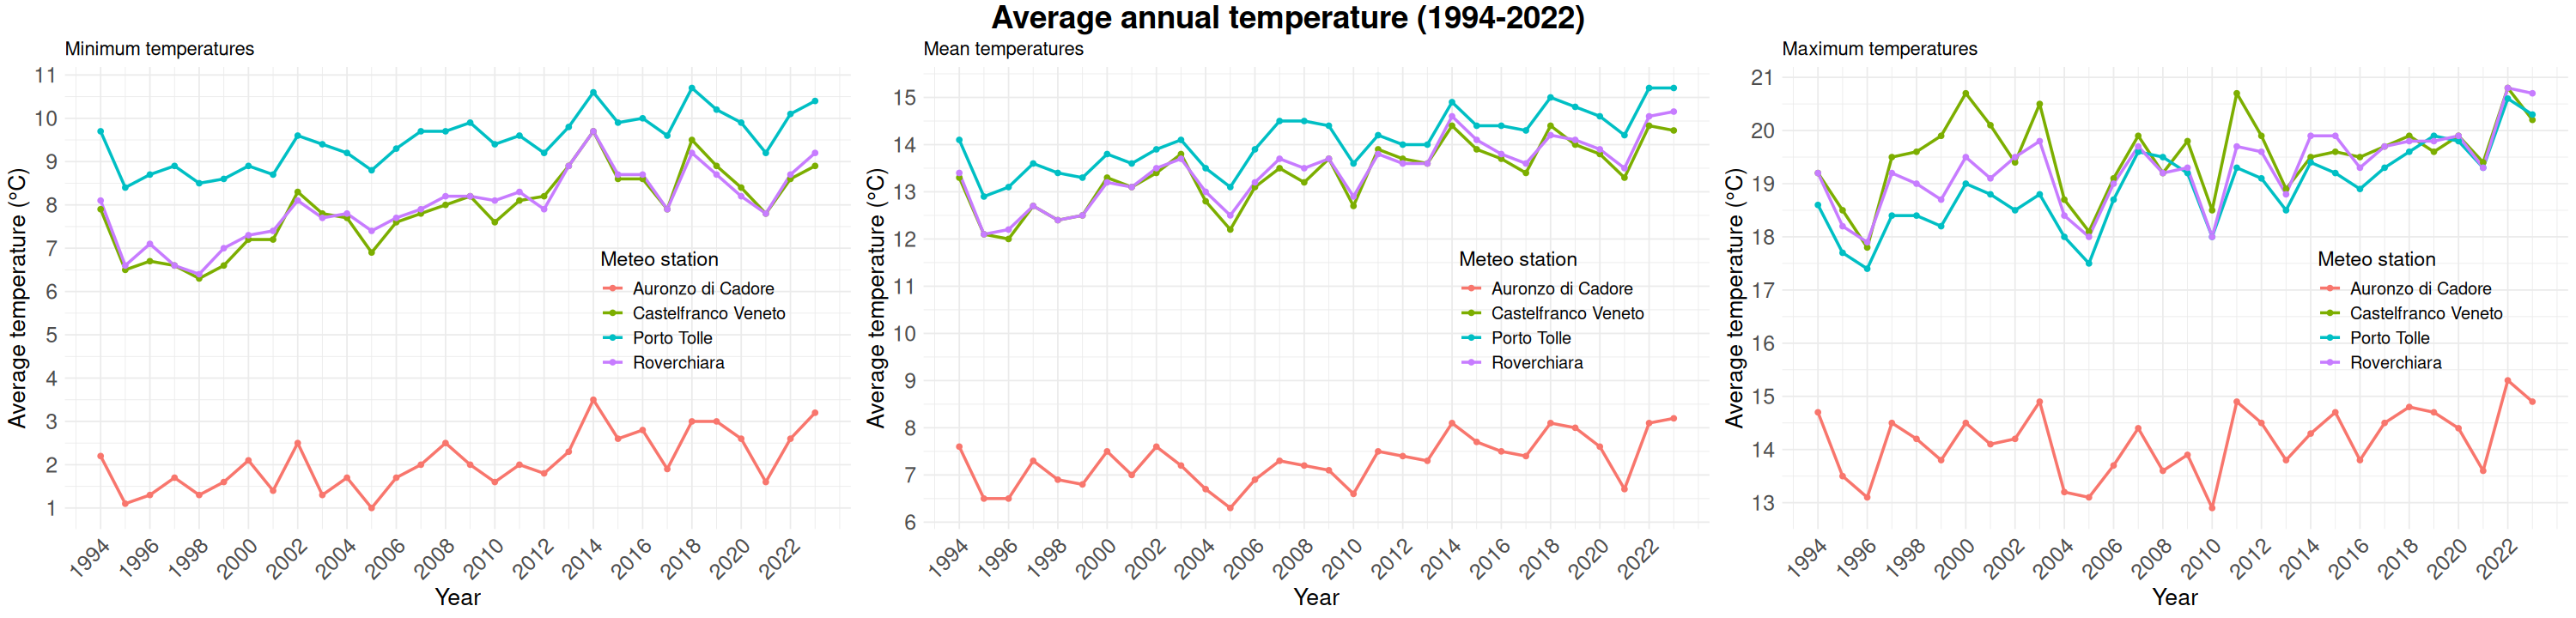

In [19]:

names_stat <- c("Auronzo" = "Auronzo di Cadore", "Castelfranco" = "Castelfranco Veneto",
  "PortoTolle" = "Porto Tolle","Roverchiara" = "Roverchiara")

plot_0<-function(df, title, names){
    ggplot(df, aes(x = Anno, y = Medio, color = paese)) +
      geom_line(size = 1) +
      geom_point() +
      scale_color_discrete(labels = names_stat) +
      labs(
        title = title,
        x = "Year",
        y = "Average temperature (°C)",
        color = "Meteo station"
      ) +
      theme_minimal() +
      scale_x_continuous(breaks=seq(1994,2022,2))+
      scale_y_continuous(breaks=seq(0,21,1))+
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
            axis.text.y = element_text(size=15),
            axis.title.x=element_text(size=16),
            axis.title.y=element_text(size=16))+
      theme(legend.position = c(0.8,0.47), legend.title=element_text(size=14), legend.text=element_text(size=12))
}
options(repr.plot.width = 25, repr.plot.height = 6) 
min_plot<-plot_0(df_min,'Minimum temperatures',names_stat)
mean_plot<-plot_0(df_mean,'Mean temperatures',names_stat)
max_plot<-plot_0(df_max, 'Maximum temperatures',names_stat)
grid.arrange(min_plot, mean_plot, max_plot, ncol=3, top = textGrob('Average annual temperature (1994-2022)', 
                gp = gpar(fontsize = 22, fontface = "bold", col = "black")))